In [1]:
!nvidia-smi

Fri Jun  3 16:46:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import numpy as np 
import pandas as pd 

import seaborn as sns ;sns.set_theme()
import matplotlib.pyplot as plt 

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings 
warnings.filterwarnings('ignore')

np.random.seed(7)
from datetime import datetime, date 

In [4]:
df = pd.read_csv("/content/Chatt-Al-Jarid.txt", sep = '\t')

In [5]:
df.head()

,TimeStamp,"MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00","DirectionUID_10,0m|Wind direction|L0,00|U360,00","Comment_10,0m","TimeStampStatus_10,0m","SampleStatus_10,0m","DataStatus_MeanWindSpeedUID_10,0m","DataStatus_DirectionUID_10,0m","MeanWindSpeedUID_100,0m|Mean wind speed|L-1,00|U75,00","DirectionUID_100,0m|Wind direction|L0,00|U360,00",...,"StabilityUID_2,0m|Stability (1/L)","RelativeHumidityUID_2,0m|Relative humidity|L0,00|U100,00","Comment_2,0m","TimeStampStatus_2,0m","SampleStatus_2,0m","DataStatus_TemperatureUID_2,0m","DataStatus_SolarRadiationUID_2,0m","DataStatus_StabilityUID_2,0m","DataStatus_RelativeHumidityUID_2,0m",Unnamed: 26
0,NaN,[m/s],[Degrees],NaN,NaN,NaN,NaN,NaN,[m/s],[Degrees],...,[1/m],[%],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/1992 01:00,"2,11","290,9",NaN,0.0,0.0,0.0,0.0,"3,79","324,1",...,"0,190390","84,3",NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,01/01/1992 02:00,"1,72","281,2",NaN,0.0,0.0,0.0,0.0,"3,62","321,1",...,"0,232599","84,1",NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,01/01/1992 03:00,"1,71","276,7",NaN,0.0,0.0,0.0,0.0,"3,92","311,5",...,"0,512680","85,5",NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,01/01/1992 04:00,"1,77","276,1",NaN,0.0,0.0,0.0,0.0,"4,27","307,2",...,"0,536433","88,1",NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [6]:
def clean_data(df):
  df.drop(0, inplace=True)
  df.drop(["Comment_10,0m", "Comment_100,0m", "Comment_2,0m", "Unnamed: 26"],
          axis = 1, inplace = True)
  df["TimesStamp"] = pd.to_datetime(df["TimeStamp"])
  df.set_index("TimeStamp", inplace=True)
  f = lambda x: float(np.NaN) if (x=="-") else float(x.replace(',','.'))
  f = np.vectorize(f)
  for i in df.columns:
    if (i!="TimeStamp"):
      if (df[i].dtype == "object"):
        df[i] = f(df[i])
      elif (df[i].std()==0):
        df.drop(i, axis = 1, inplace = True)
  return df

In [7]:
df = clean_data(df)

In [8]:
df.head()

,"MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00","DirectionUID_10,0m|Wind direction|L0,00|U360,00","MeanWindSpeedUID_100,0m|Mean wind speed|L-1,00|U75,00","DirectionUID_100,0m|Wind direction|L0,00|U360,00","TemperatureUID_2,0m|Temperature|L-50,00|U60,00","SolarRadiationUID_2,0m|Solar irradiation|L-10,00|U2000,00","StabilityUID_2,0m|Stability (1/L)","RelativeHumidityUID_2,0m|Relative humidity|L0,00|U100,00","DataStatus_StabilityUID_2,0m",TimesStamp
TimeStamp,,,,,,,,,,
01/01/1992 01:00,2.11,290.9,3.79,324.1,4.6,0.0,0.190390,84.3,0.0,1992-01-01 01:00:00
01/01/1992 02:00,1.72,281.2,3.62,321.1,4.7,0.0,0.232599,84.1,0.0,1992-01-01 02:00:00
01/01/1992 03:00,1.71,276.7,3.92,311.5,4.6,0.0,0.512680,85.5,0.0,1992-01-01 03:00:00
01/01/1992 04:00,1.77,276.1,4.27,307.2,4.3,0.0,0.536433,88.1,0.0,1992-01-01 04:00:00
01/01/1992 05:00,1.75,279.6,4.47,310.3,4.1,0.0,0.350248,88.4,0.0,1992-01-01 05:00:00


In [9]:
df.shape

(262992, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262992 entries, 01/01/1992 01:00 to 01/01/2022 00:00
Data columns (total 10 columns):
 #   Column                                                     Non-Null Count   Dtype         
---  ------                                                     --------------   -----         
 0   MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00       262992 non-null  float64       
 1   DirectionUID_10,0m|Wind direction|L0,00|U360,00            262992 non-null  float64       
 2   MeanWindSpeedUID_100,0m|Mean wind speed|L-1,00|U75,00      262992 non-null  float64       
 3   DirectionUID_100,0m|Wind direction|L0,00|U360,00           262992 non-null  float64       
 4   TemperatureUID_2,0m|Temperature|L-50,00|U60,00             262992 non-null  float64       
 5   SolarRadiationUID_2,0m|Solar irradiation|L-10,00|U2000,00  262992 non-null  float64       
 6   StabilityUID_2,0m|Stability (1/L)                          262984 non-null  float64       
 7   

In [11]:
df.describe()

,"MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00","DirectionUID_10,0m|Wind direction|L0,00|U360,00","MeanWindSpeedUID_100,0m|Mean wind speed|L-1,00|U75,00","DirectionUID_100,0m|Wind direction|L0,00|U360,00","TemperatureUID_2,0m|Temperature|L-50,00|U60,00","SolarRadiationUID_2,0m|Solar irradiation|L-10,00|U2000,00","StabilityUID_2,0m|Stability (1/L)","RelativeHumidityUID_2,0m|Relative humidity|L0,00|U100,00","DataStatus_StabilityUID_2,0m"
count,262992.000000,262992.000000,262992.000000,262992.000000,262992.000000,262992.000000,262984.000000,262992.000000,262992.000000
mean,2.946974,181.425148,4.878747,182.786023,20.454083,213.372934,-11.667888,61.123756,0.000973
std,1.539129,110.790483,2.385734,112.384618,7.789131,290.923638,2126.417138,20.362745,0.176489
min,0.000000,0.000000,0.010000,0.000000,0.400000,0.000000,-747433.875000,5.700000,0.000000
25%,1.800000,83.000000,3.080000,81.200000,14.300000,0.000000,-0.056436,44.700000,0.000000
50%,2.640000,179.700000,4.770000,182.200000,20.100000,10.580000,0.011801,61.500000,0.000000
75%,3.870000,287.700000,6.440000,293.600000,25.900000,408.920000,0.116250,78.300000,0.000000
max,13.030000,359.900000,20.200000,359.900000,46.900000,998.630000,112017.484375,100.000000,32.000000


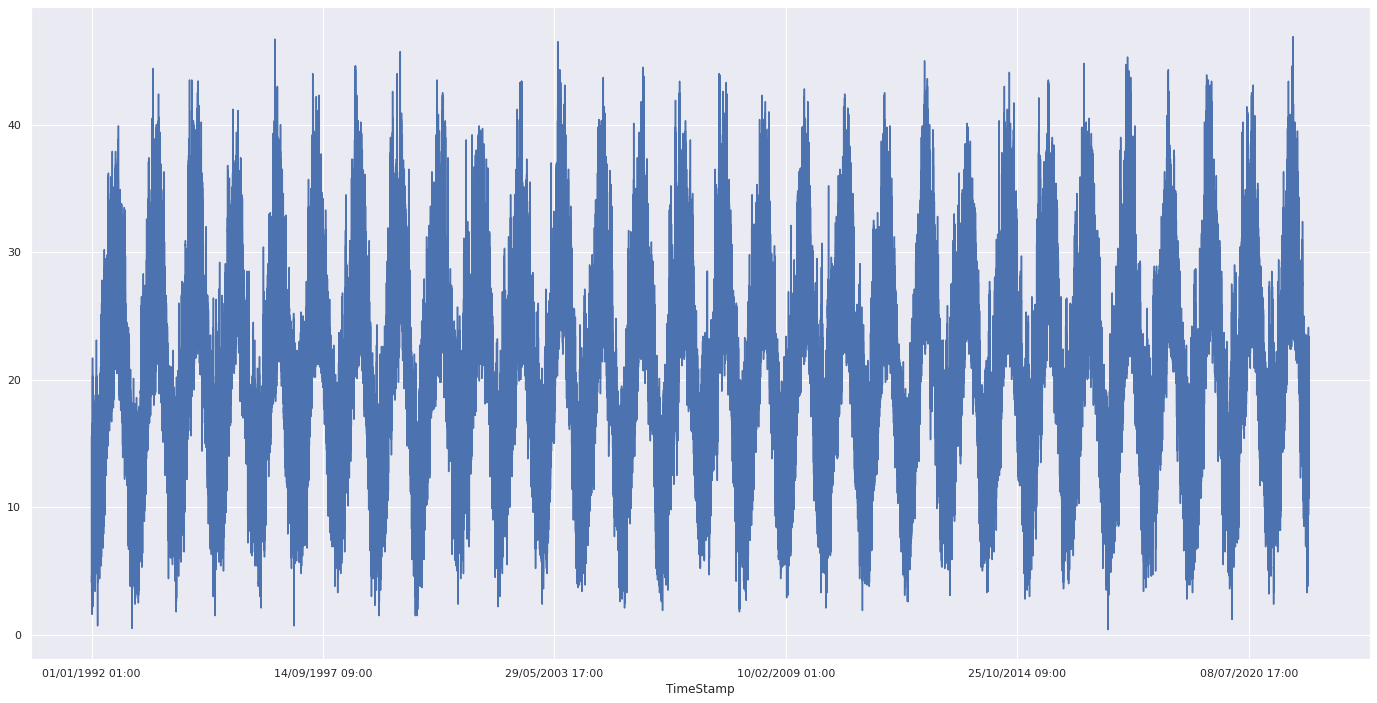

In [12]:
df["TemperatureUID_2,0m|Temperature|L-50,00|U60,00"].plot(figsize = (24,12))

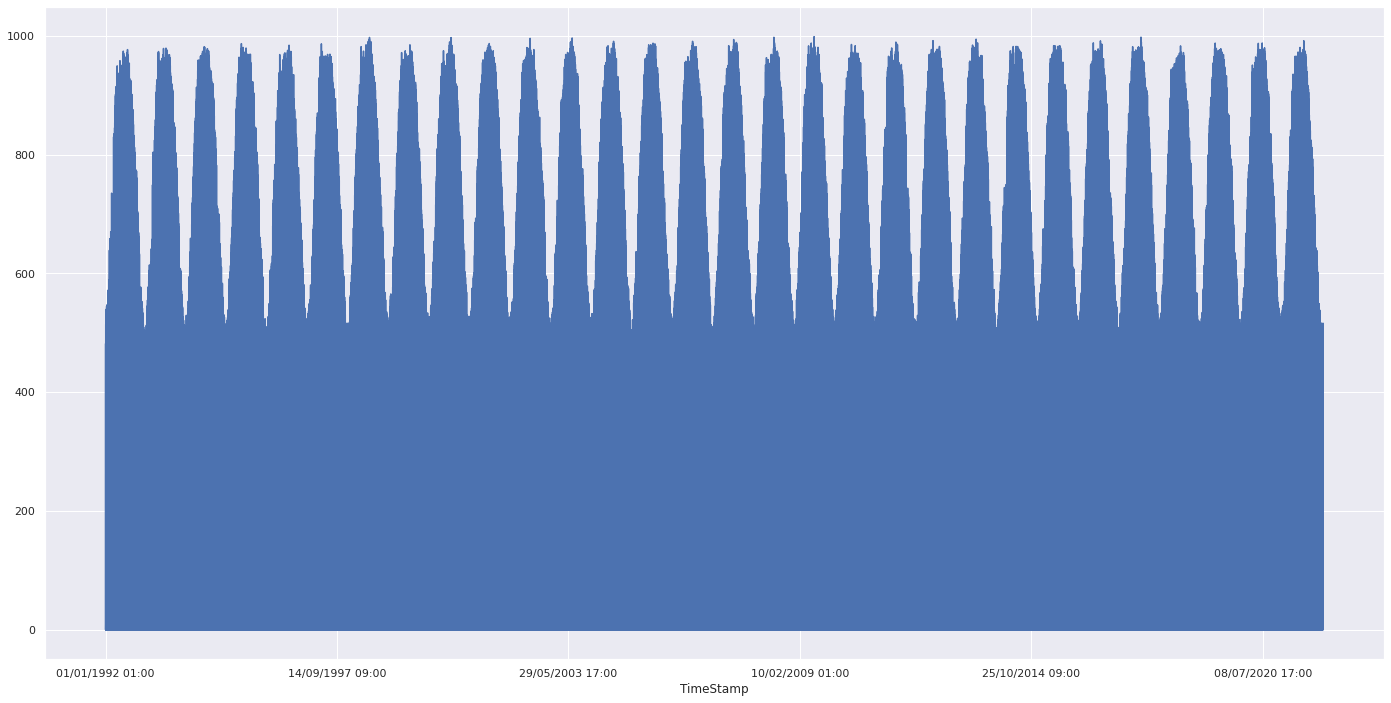

In [13]:
df["SolarRadiationUID_2,0m|Solar irradiation|L-10,00|U2000,00"].plot(figsize = (24,12))

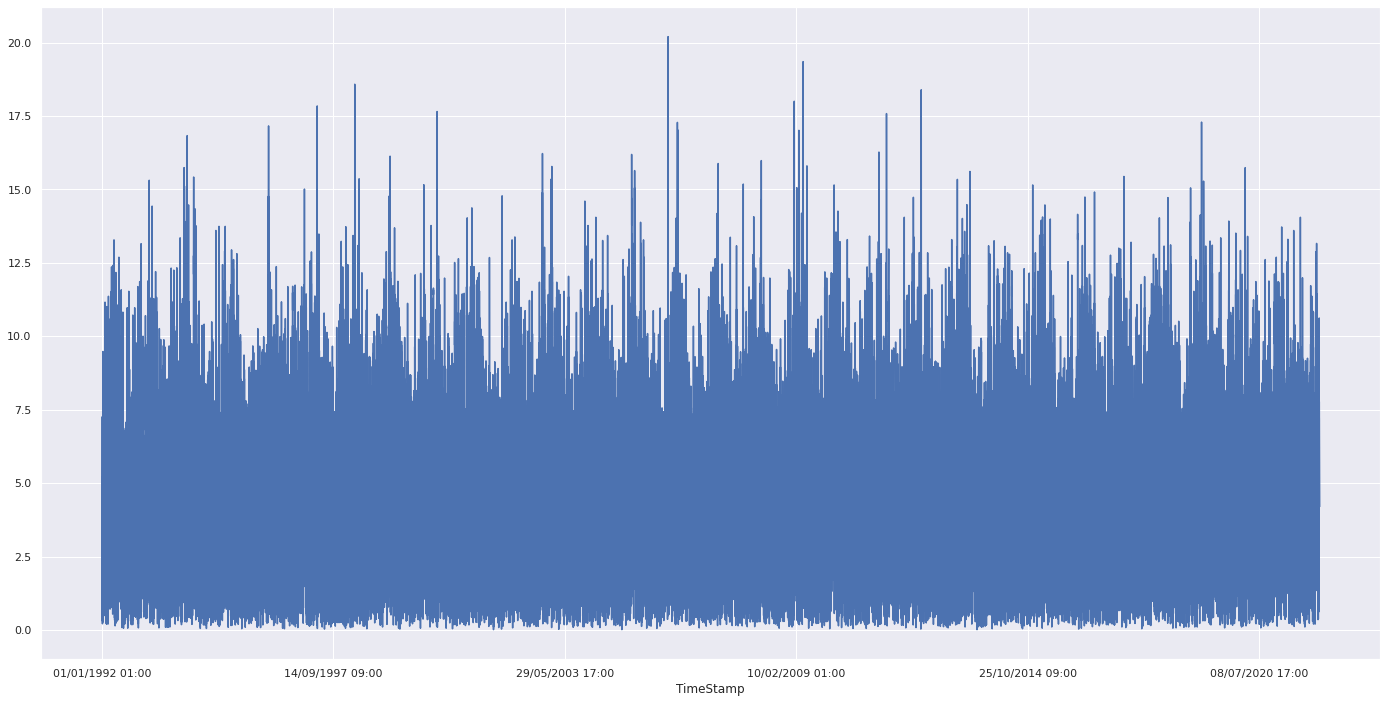

In [14]:
df["MeanWindSpeedUID_100,0m|Mean wind speed|L-1,00|U75,00"].plot(figsize = (24,12))

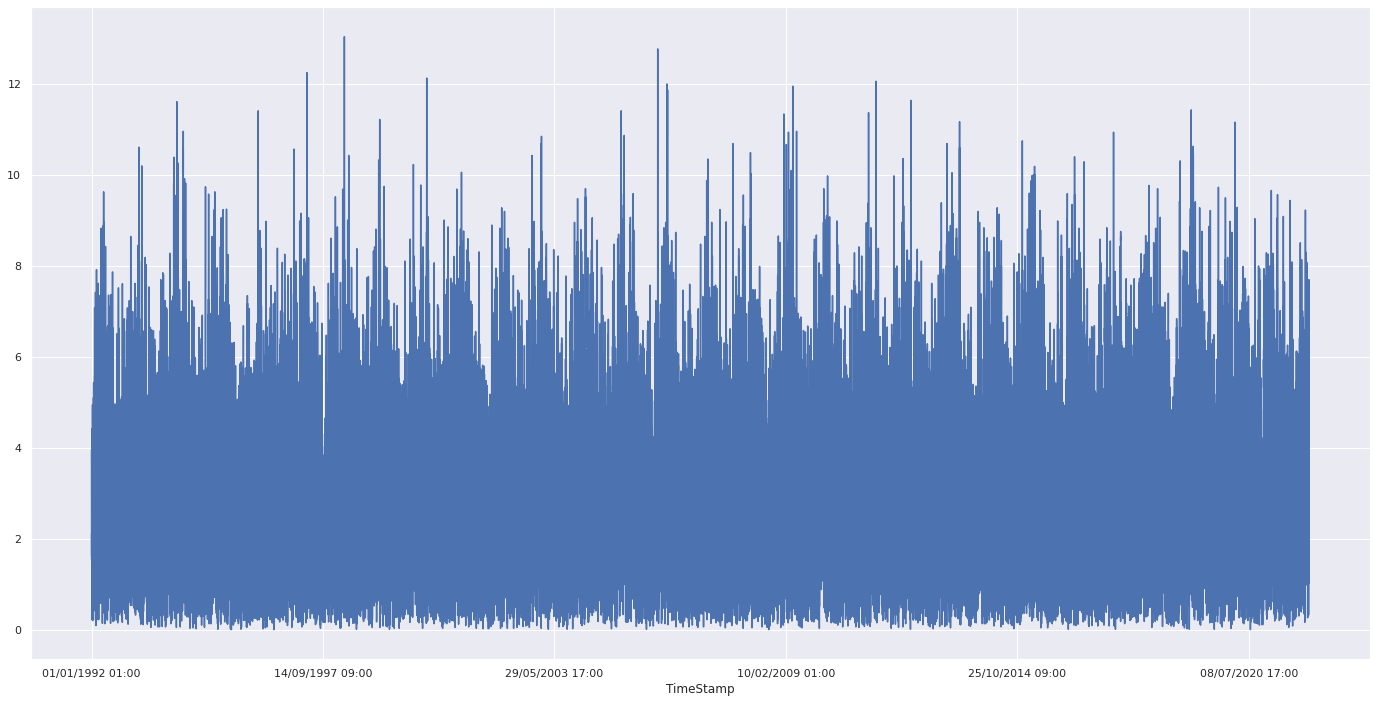

In [15]:
df["MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00"].plot(figsize = (24,12))

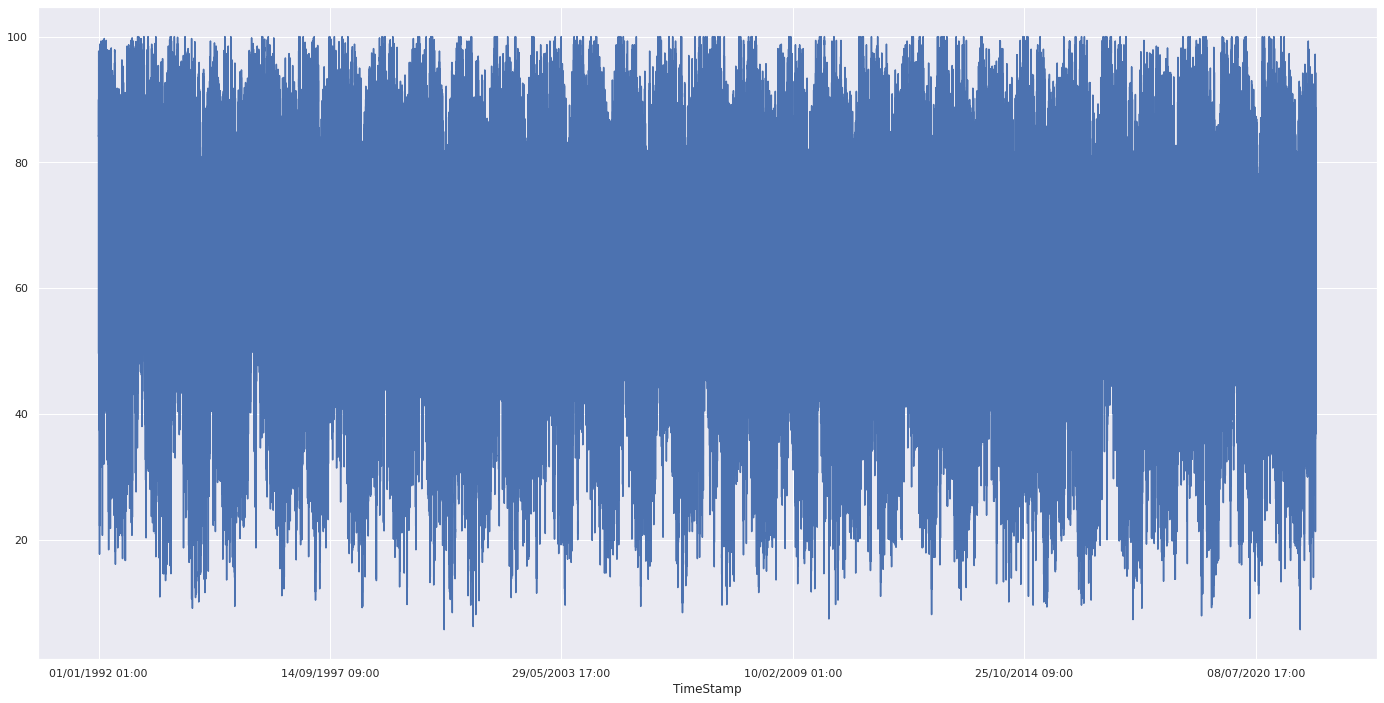

In [16]:
df["RelativeHumidityUID_2,0m|Relative humidity|L0,00|U100,00"].plot(figsize = (24,12))

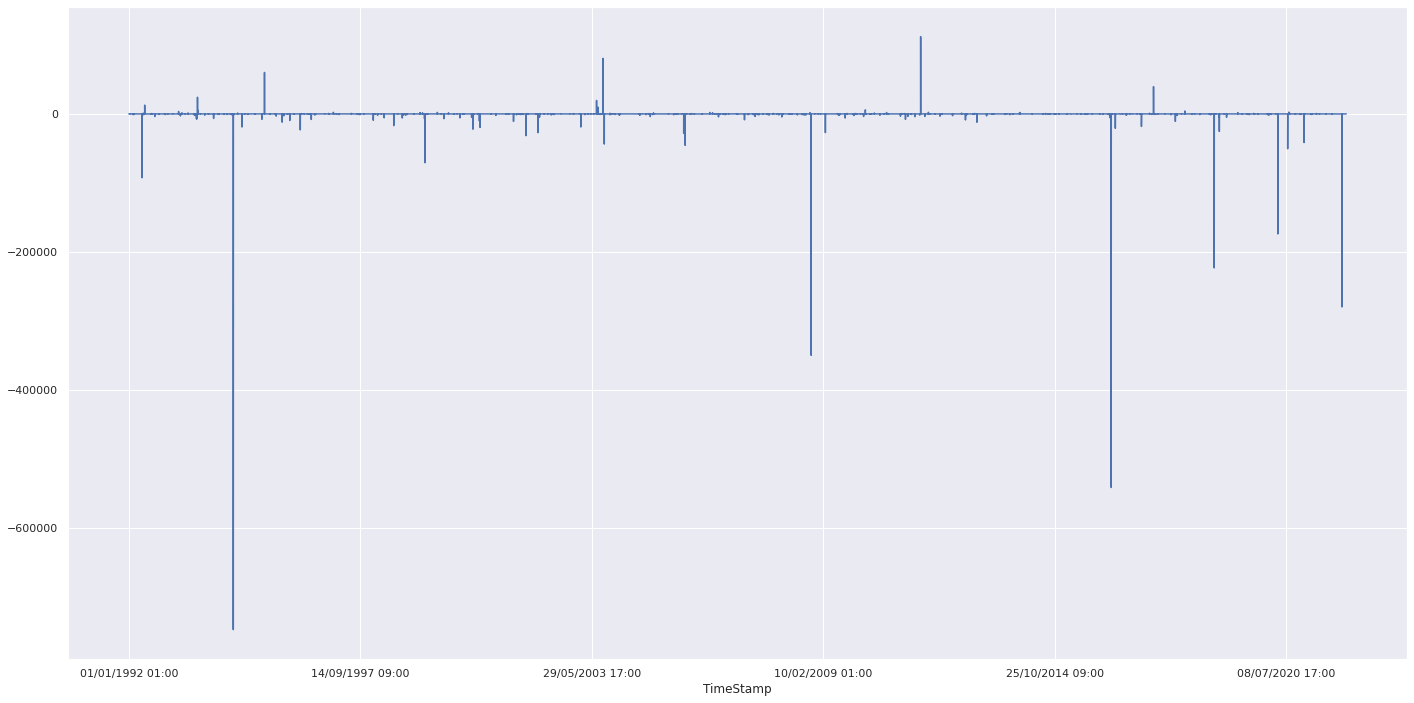

In [17]:
df["StabilityUID_2,0m|Stability (1/L)"].plot(figsize = (24,12))

In [18]:
df = df.sort_values(by='TimesStamp')
df['Diff'] = df['TimesStamp'] - df['TimesStamp'].shift(1)
df[['TimesStamp', 'Diff']].head()

,TimesStamp,Diff
TimeStamp,,
01/01/1992 01:00,1992-01-01 01:00:00,NaT
01/01/1992 02:00,1992-01-01 02:00:00,0 days 01:00:00
01/01/1992 03:00,1992-01-01 03:00:00,0 days 01:00:00
01/01/1992 04:00,1992-01-01 04:00:00,0 days 01:00:00
01/01/1992 05:00,1992-01-01 05:00:00,0 days 01:00:00


In [19]:
df['Diff'].sum(), df['Diff'].count()

(Timedelta('10957 days 23:00:00'), 262991)

In [20]:
df = df.drop('Diff', axis=1)
df.isna().sum()

MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00         0
DirectionUID_10,0m|Wind direction|L0,00|U360,00              0
MeanWindSpeedUID_100,0m|Mean wind speed|L-1,00|U75,00        0
DirectionUID_100,0m|Wind direction|L0,00|U360,00             0
TemperatureUID_2,0m|Temperature|L-50,00|U60,00               0
SolarRadiationUID_2,0m|Solar irradiation|L-10,00|U2000,00    0
StabilityUID_2,0m|Stability (1/L)                            8
RelativeHumidityUID_2,0m|Relative humidity|L0,00|U100,00     0
DataStatus_StabilityUID_2,0m                                 0
TimesStamp                                                   0
dtype: int64

In [21]:
df[df['StabilityUID_2,0m|Stability (1/L)'].isnull()]

,"MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00","DirectionUID_10,0m|Wind direction|L0,00|U360,00","MeanWindSpeedUID_100,0m|Mean wind speed|L-1,00|U75,00","DirectionUID_100,0m|Wind direction|L0,00|U360,00","TemperatureUID_2,0m|Temperature|L-50,00|U60,00","SolarRadiationUID_2,0m|Solar irradiation|L-10,00|U2000,00","StabilityUID_2,0m|Stability (1/L)","RelativeHumidityUID_2,0m|Relative humidity|L0,00|U100,00","DataStatus_StabilityUID_2,0m",TimesStamp
TimeStamp,,,,,,,,,,
23/05/1993 04:00,0.63,20.4,0.62,29.6,16.2,0.00,NaN,90.5,32.0,1993-05-23 04:00:00
16/04/2001 01:00,0.25,109.6,1.24,194.8,11.7,0.00,NaN,65.3,32.0,2001-04-16 01:00:00
29/07/2004 06:00,0.78,73.9,1.09,54.8,22.6,120.59,NaN,78.2,32.0,2004-07-29 06:00:00
13/07/2005 01:00,0.19,341.3,0.75,119.4,24.6,0.00,NaN,71.0,32.0,2005-07-13 01:00:00
28/07/2006 06:00,0.76,348.4,1.61,8.4,24.7,132.32,NaN,72.4,32.0,2006-07-28 06:00:00
05/03/2010 06:00,0.68,258.9,1.70,342.6,12.7,1.81,NaN,68.3,32.0,2010-05-03 06:00:00
06/04/2010 06:00,0.73,337.4,1.65,17.1,12.6,45.87,NaN,59.0,32.0,2010-06-04 06:00:00
23/08/2014 02:00,0.32,215.1,0.37,237.2,25.2,0.00,NaN,81.0,32.0,2014-08-23 02:00:00


(727198.0, 738156.0)

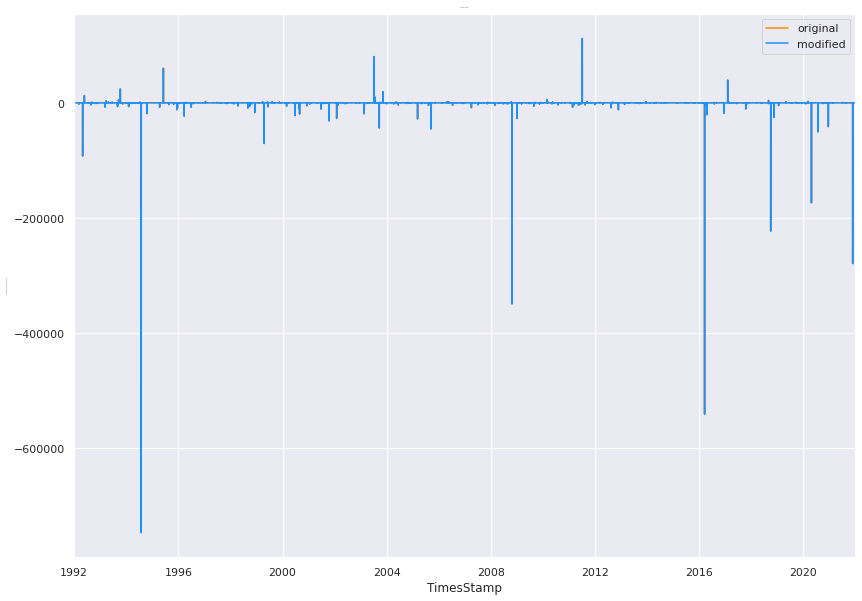

In [22]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,10))
old = df['StabilityUID_2,0m|Stability (1/L)'].copy()
df['StabilityUID_2,0m|Stability (1/L)'] = df['StabilityUID_2,0m|Stability (1/L)'].replace(0, np.nan)
sns.lineplot(x=df['TimesStamp'], y=old, ax=ax, color='darkorange', label='original')
sns.lineplot(x=df['TimesStamp'], y=df['StabilityUID_2,0m|Stability (1/L)'].fillna(200), ax=ax, color='dodgerblue', label='modified')
ax.set_title('Feature: Stability', fontsize=1)
ax.set_ylabel(ylabel='StabilityUID_2,0m|Stability (1/L)', fontsize=1)
ax.set_xlim([date(1992,1,1),date(2022,1,1)])

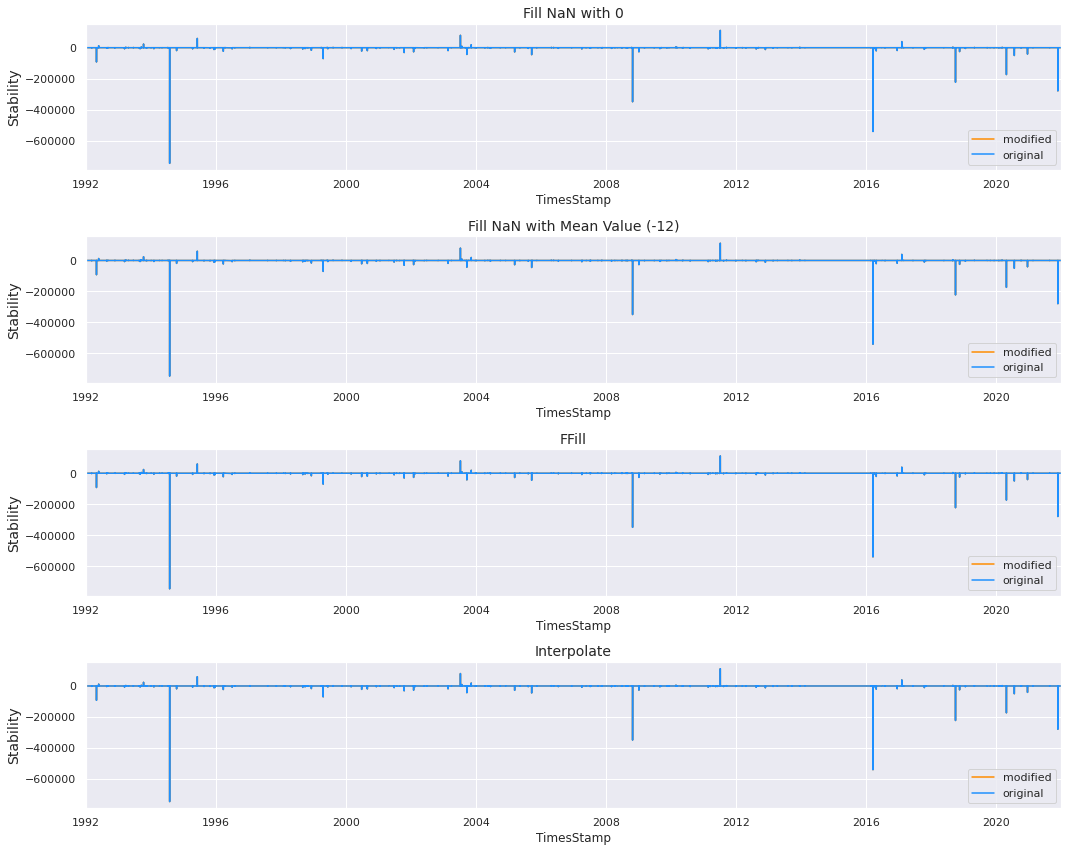

In [23]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['TimesStamp'], y=df['StabilityUID_2,0m|Stability (1/L)'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['TimesStamp'], y=df['StabilityUID_2,0m|Stability (1/L)'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Stability', fontsize=14)

mean_stab = df['StabilityUID_2,0m|Stability (1/L)'].mean()
sns.lineplot(x=df['TimesStamp'], y=df['StabilityUID_2,0m|Stability (1/L)'].fillna(mean_stab), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df['TimesStamp'], y=df['StabilityUID_2,0m|Stability (1/L)'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_stab:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Stability', fontsize=14)
sns.lineplot(x=df['TimesStamp'], y=df['StabilityUID_2,0m|Stability (1/L)'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['TimesStamp'], y=df['StabilityUID_2,0m|Stability (1/L)'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Stability', fontsize=14)

sns.lineplot(x=df['TimesStamp'], y=df['StabilityUID_2,0m|Stability (1/L)'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df['TimesStamp'], y=df['StabilityUID_2,0m|Stability (1/L)'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Stability', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(1992, 1, 1), date(2022, 1, 1)])
    
plt.tight_layout()
plt.show()

In [24]:
df['StabilityUID_2,0m|Stability (1/L)'] = df['StabilityUID_2,0m|Stability (1/L)'].interpolate()

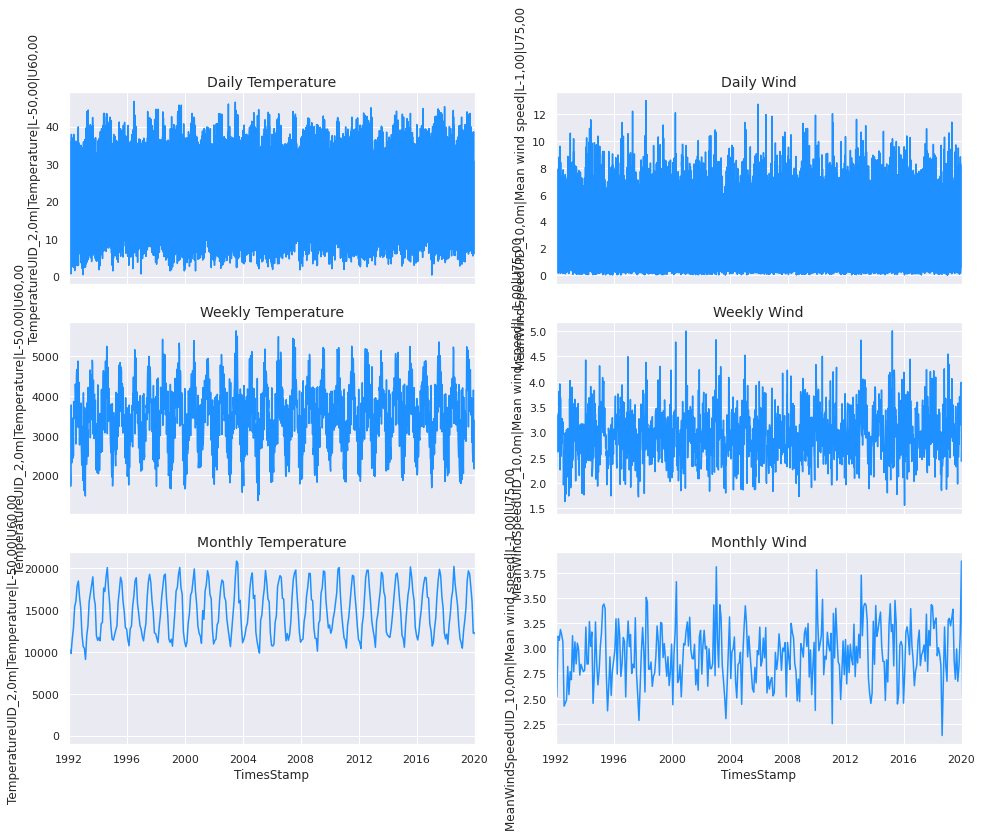

In [25]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16,12))

sns.lineplot(df['TimesStamp'], df['TemperatureUID_2,0m|Temperature|L-50,00|U60,00'], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Daily Temperature', fontsize=14)

resampled_df = df[['TimesStamp','TemperatureUID_2,0m|Temperature|L-50,00|U60,00']].resample('7D', on='TimesStamp').sum().reset_index(drop=False)
sns.lineplot(resampled_df['TimesStamp'], resampled_df['TemperatureUID_2,0m|Temperature|L-50,00|U60,00'], color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly Temperature', fontsize=14)

resampled_df = df[['TimesStamp','TemperatureUID_2,0m|Temperature|L-50,00|U60,00']].resample('M', on='TimesStamp').sum().reset_index(drop=False)
sns.lineplot(resampled_df['TimesStamp'], resampled_df['TemperatureUID_2,0m|Temperature|L-50,00|U60,00'], color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly Temperature', fontsize=14)

for i in range(3):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(df['TimesStamp'], df['MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Wind', fontsize=14)

resampled_df = df[['TimesStamp','MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00']].resample('7D', on='TimesStamp').mean().reset_index(drop=False)
sns.lineplot(resampled_df['TimesStamp'], resampled_df['MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00'], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Wind', fontsize=14)

resampled_df = df[['TimesStamp','MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00']].resample('M', on='TimesStamp').mean().reset_index(drop=False)
sns.lineplot(resampled_df['TimesStamp'], resampled_df['MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00'], color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Wind', fontsize=14)

for i in range(3):
    ax[i, 1].set_xlim([date(1992, 1, 1), date(2020, 1, 1)])
plt.show()

In [26]:
downsample1 = df[['TimesStamp',
                 'MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00', 
                 'DirectionUID_10,0m|Wind direction|L0,00|U360,00',
                 'MeanWindSpeedUID_100,0m|Mean wind speed|L-1,00|U75,00', 
                 'DirectionUID_100,0m|Wind direction|L0,00|U360,00',  
                 'TemperatureUID_2,0m|Temperature|L-50,00|U60,00',
                 'RelativeHumidityUID_2,0m|Relative humidity|L0,00|U100,00'
                ]].resample('7D', on='TimesStamp').mean().reset_index(drop=False)

In [27]:
downsample2 = df[['TimesStamp','TemperatureUID_2,0m|Temperature|L-50,00|U60,00']].resample('7D', on='TimesStamp').max().reset_index(drop=True)
downsample3 = df[['TimesStamp','TemperatureUID_2,0m|Temperature|L-50,00|U60,00']].resample('7D', on='TimesStamp').min().reset_index(drop=True)
downsample4 = df[['TimesStamp','SolarRadiationUID_2,0m|Solar irradiation|L-10,00|U2000,00']].resample('7D', on='TimesStamp').max().reset_index(drop=True)
downsample2['Tmax']=downsample2['TemperatureUID_2,0m|Temperature|L-50,00|U60,00']
downsample2=downsample2.drop(['TimesStamp'],axis=1)
downsample2=downsample2.drop(['TemperatureUID_2,0m|Temperature|L-50,00|U60,00'],axis=1)
downsample3['Tmin']=downsample3['TemperatureUID_2,0m|Temperature|L-50,00|U60,00']
downsample3=downsample3.drop(['TimesStamp'],axis=1)
downsample3=downsample3.drop(['TemperatureUID_2,0m|Temperature|L-50,00|U60,00'],axis=1)
downsample4['SolarRadiation']=downsample4['SolarRadiationUID_2,0m|Solar irradiation|L-10,00|U2000,00']
downsample4=downsample4.drop(['TimesStamp'],axis=1)
downsample4=downsample4.drop(['SolarRadiationUID_2,0m|Solar irradiation|L-10,00|U2000,00'],axis=1)

downsample=pd.concat([downsample1,downsample2,downsample3,downsample4],axis=1)

df = downsample.copy()

In [28]:
df

,TimesStamp,"MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00","DirectionUID_10,0m|Wind direction|L0,00|U360,00","MeanWindSpeedUID_100,0m|Mean wind speed|L-1,00|U75,00","DirectionUID_100,0m|Wind direction|L0,00|U360,00","TemperatureUID_2,0m|Temperature|L-50,00|U60,00","RelativeHumidityUID_2,0m|Relative humidity|L0,00|U100,00",Tmax,Tmin,SolarRadiation
0,1992-01-01,2.867186,203.671856,4.879940,190.431737,15.437725,68.339521,34.1,4.1,908.76
1,1992-01-08,2.202976,159.374405,3.505655,159.203571,19.350595,67.343452,36.6,4.5,954.01
2,1992-01-15,2.089464,201.719048,3.616190,200.168452,10.807738,73.344643,17.9,5.3,567.96
3,1992-01-22,2.814881,169.758929,4.927738,177.752976,10.973810,75.454167,18.3,4.4,571.56
4,1992-01-29,2.716607,181.395833,4.942619,178.210714,11.037500,77.920238,21.5,3.3,881.76
...,...,...,...,...,...,...,...,...,...,...
1561,2021-12-01,3.212381,183.285714,5.217857,190.740476,19.727381,56.223810,40.5,6.8,973.90
1562,2021-12-08,2.704583,232.880357,4.710893,239.994643,18.986905,56.234524,42.0,3.3,929.51
1563,2021-12-15,2.034524,227.947024,3.641607,228.058333,11.226190,71.952381,18.4,3.8,515.11
1564,2021-12-22,2.841667,196.641667,5.252976,197.410714,15.495833,61.853571,24.1,8.1,504.92


In [ ]:
df.isna().sum()

TimesStamp                                                   0
MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00         0
DirectionUID_10,0m|Wind direction|L0,00|U360,00              0
MeanWindSpeedUID_100,0m|Mean wind speed|L-1,00|U75,00        0
DirectionUID_100,0m|Wind direction|L0,00|U360,00             0
TemperatureUID_2,0m|Temperature|L-50,00|U60,00               0
StabilityUID_2,0m|Stability (1/L)                            0
RelativeHumidityUID_2,0m|Relative humidity|L0,00|U100,00     0
SolarRadiationUID_2,0m|Solar irradiation|L-10,00|U2000,00    0
dtype: int64

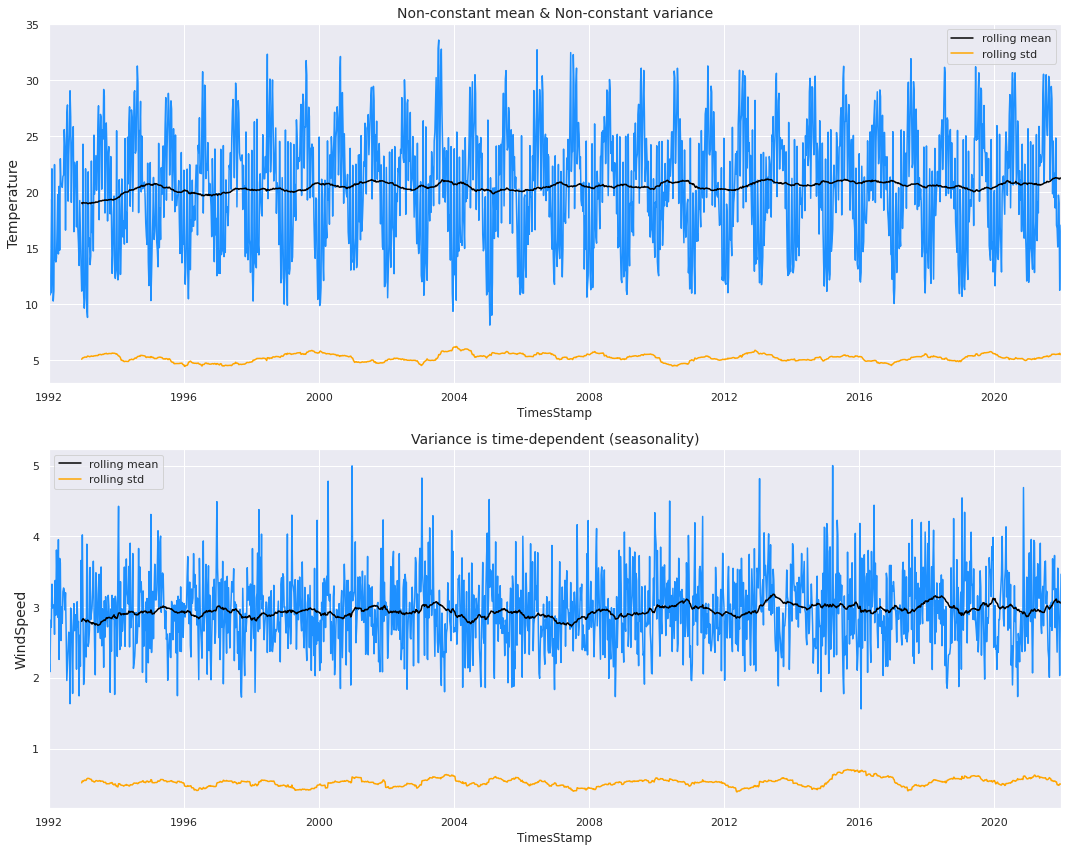

In [29]:
rolling_window = 52
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['TimesStamp'], y=df['TemperatureUID_2,0m|Temperature|L-50,00|U60,00'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=df['TimesStamp'], y=df['TemperatureUID_2,0m|Temperature|L-50,00|U60,00'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=df['TimesStamp'], y=df['TemperatureUID_2,0m|Temperature|L-50,00|U60,00'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('Non-constant mean & Non-constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='Temperature', fontsize=14)
ax[0].set_xlim([date(1992, 1, 1), date(2022, 1, 1)])

sns.lineplot(x=df['TimesStamp'], y=df['MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=df['TimesStamp'], y=df['MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=df['TimesStamp'], y=df['MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title('Variance is time-dependent (seasonality)', fontsize=14)
ax[1].set_ylabel(ylabel='WindSpeed', fontsize=14)
ax[1].set_xlim([date(1992, 1, 1), date(2022, 1, 1)])

plt.tight_layout()
plt.show()

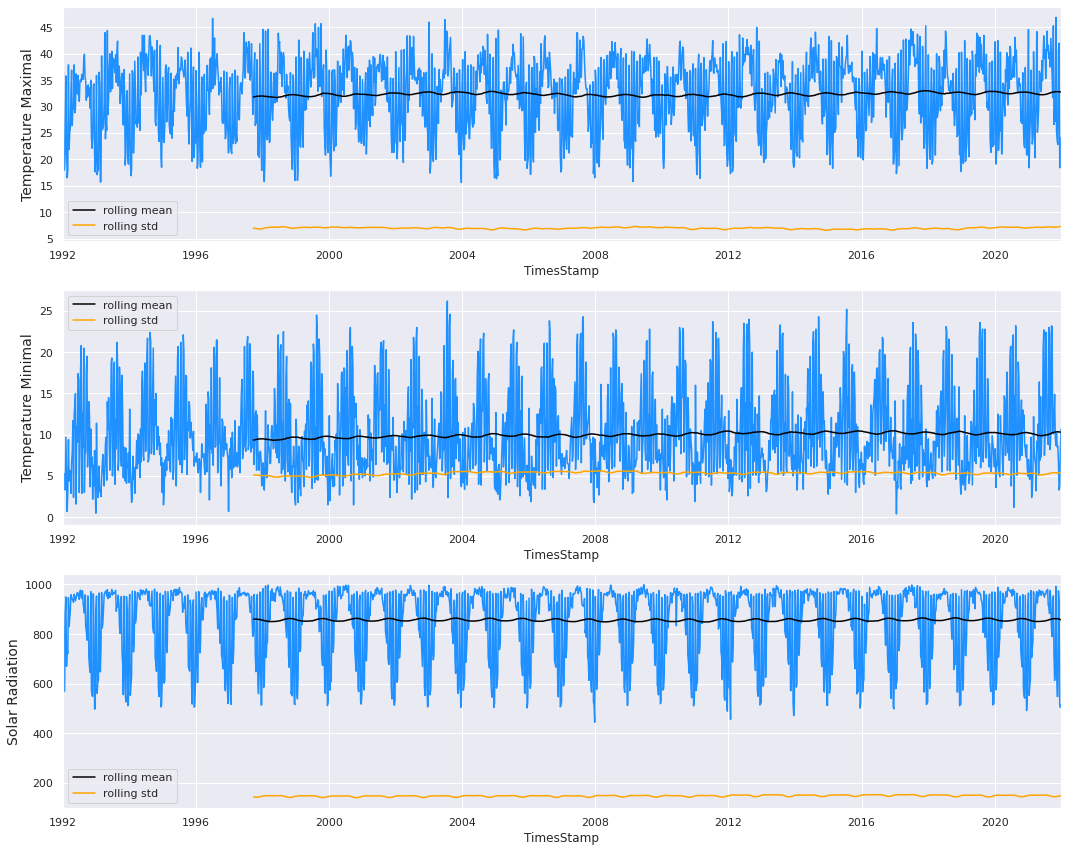

In [30]:
rolling_window = 300
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['TimesStamp'], y=df['Tmax'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=df['TimesStamp'], y=df['Tmax'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=df['TimesStamp'], y=df['Tmax'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_ylabel(ylabel='Temperature Maximal', fontsize=14)
ax[0].set_xlim([date(1992, 1, 1), date(2022, 1, 1)])

sns.lineplot(x=df['TimesStamp'], y=df['Tmin'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=df['TimesStamp'], y=df['Tmin'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=df['TimesStamp'], y=df['Tmin'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_ylabel(ylabel='Temperature Minimal', fontsize=14)
ax[1].set_xlim([date(1992, 1, 1), date(2022, 1, 1)])

sns.lineplot(x=df['TimesStamp'], y=df['SolarRadiation'], ax=ax[2], color='dodgerblue')
sns.lineplot(x=df['TimesStamp'], y=df['SolarRadiation'].rolling(rolling_window).mean(), ax=ax[2], color='black', label='rolling mean')
sns.lineplot(x=df['TimesStamp'], y=df['SolarRadiation'].rolling(rolling_window).std(), ax=ax[2], color='orange', label='rolling std')
ax[2].set_ylabel(ylabel='Solar Radiation', fontsize=14)
ax[2].set_xlim([date(1992, 1, 1), date(2022, 1, 1)])

plt.tight_layout()
plt.show()

In [31]:
df.columns

Index(['TimesStamp', 'MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00',
       'DirectionUID_10,0m|Wind direction|L0,00|U360,00',
       'MeanWindSpeedUID_100,0m|Mean wind speed|L-1,00|U75,00',
       'DirectionUID_100,0m|Wind direction|L0,00|U360,00',
       'TemperatureUID_2,0m|Temperature|L-50,00|U60,00',
       'RelativeHumidityUID_2,0m|Relative humidity|L0,00|U100,00', 'Tmax',
       'Tmin', 'SolarRadiation'],
      dtype='object')

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  ['TemperatureUID_2,0m|Temperature|L-50,00|U60,00',
                 'SolarRadiation'
]



for column in core_columns:
  
    decomp = seasonal_decompose(df[column],freq=52,model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal 

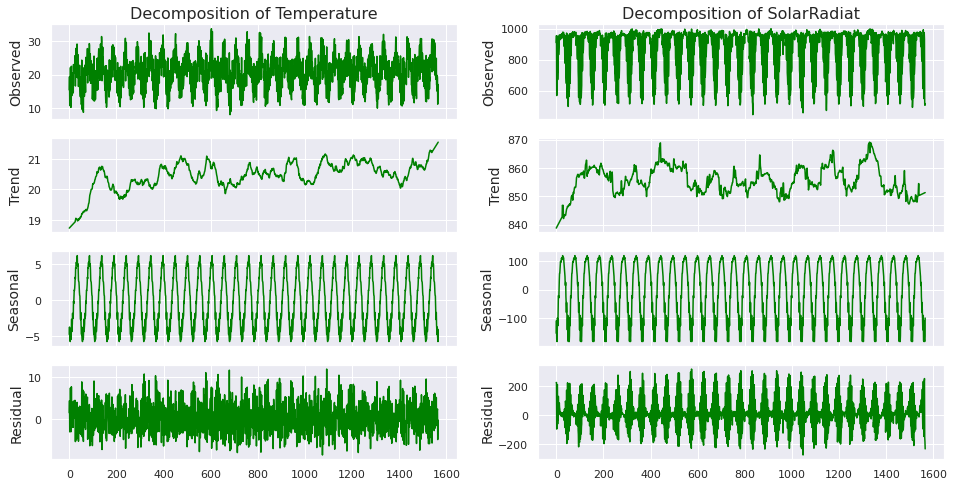

In [33]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['TemperatureUID_2,0m|Temperature|L-50,00|U60,00',
                 'SolarRadiation']):
    
    res = seasonal_decompose(df[column], freq=52, model='additive', extrapolate_trend='freq')
    ax[0,i].set_title('Decomposition of {}'.format(column)[:28], fontsize=16)

    res.observed.plot(ax=ax[0,i], legend=False, color='green')
    ax[0,i].set_ylabel('Observed', fontsize=14)
    

    res.trend.plot(ax=ax[1,i], legend=False, color='green')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='green')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    
    res.resid.plot(ax=ax[3,i], legend=False, color='green')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

In [35]:
df.columns

Index(['TimesStamp', 'MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00',
       'DirectionUID_10,0m|Wind direction|L0,00|U360,00',
       'MeanWindSpeedUID_100,0m|Mean wind speed|L-1,00|U75,00',
       'DirectionUID_100,0m|Wind direction|L0,00|U360,00',
       'TemperatureUID_2,0m|Temperature|L-50,00|U60,00',
       'RelativeHumidityUID_2,0m|Relative humidity|L0,00|U100,00', 'Tmax',
       'Tmin', 'SolarRadiation',
       'TemperatureUID_2,0m|Temperature|L-50,00|U60,00_trend',
       'TemperatureUID_2,0m|Temperature|L-50,00|U60,00_seasonal',
       'SolarRadiation_trend', 'SolarRadiation_seasonal',
       'TemperatureUID_2,0m|Temperature|L-50,00|U60,00_seasonal_shift_b_2m',
       'TemperatureUID_2,0m|Temperature|L-50,00|U60,00_seasonal_shift_b_1m',
       'TemperatureUID_2,0m|Temperature|L-50,00|U60,00_seasonal_shift_1m',
       'TemperatureUID_2,0m|Temperature|L-50,00|U60,00_seasonal_shift_2m',
       'TemperatureUID_2,0m|Temperature|L-50,00|U60,00_seasonal_shift_3m',
       'Tem

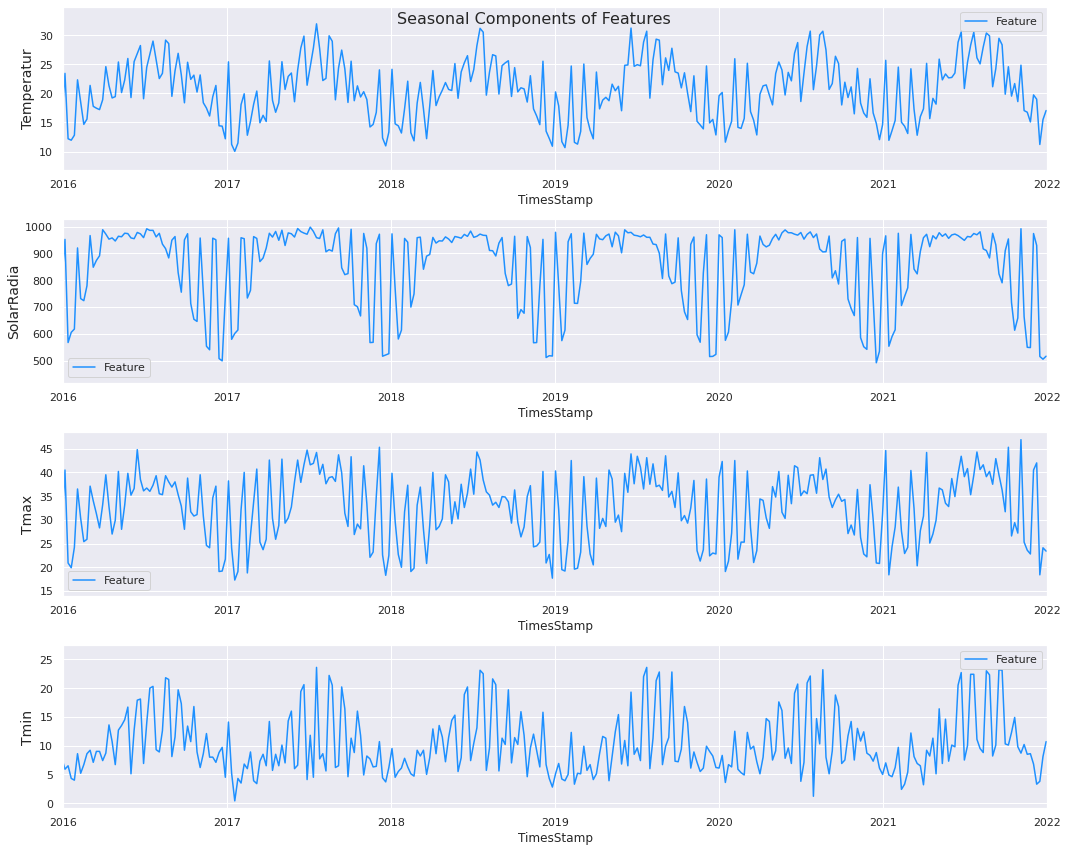

In [38]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

core_columns1 =  ['TemperatureUID_2,0m|Temperature|L-50,00|U60,00',
                 'SolarRadiation','Tmax','Tmin'
]

for i, column in enumerate(core_columns1):
    sns.lineplot(x=df['TimesStamp'], y=df[column], ax=ax[i], color='dodgerblue', label='Feature')
    ax[i].set_ylabel(ylabel=column[:10], fontsize=14)
    ax[i].set_xlim([date(2016, 1, 1), date(2022, 1, 1)])
    
plt.tight_layout()
plt.show()

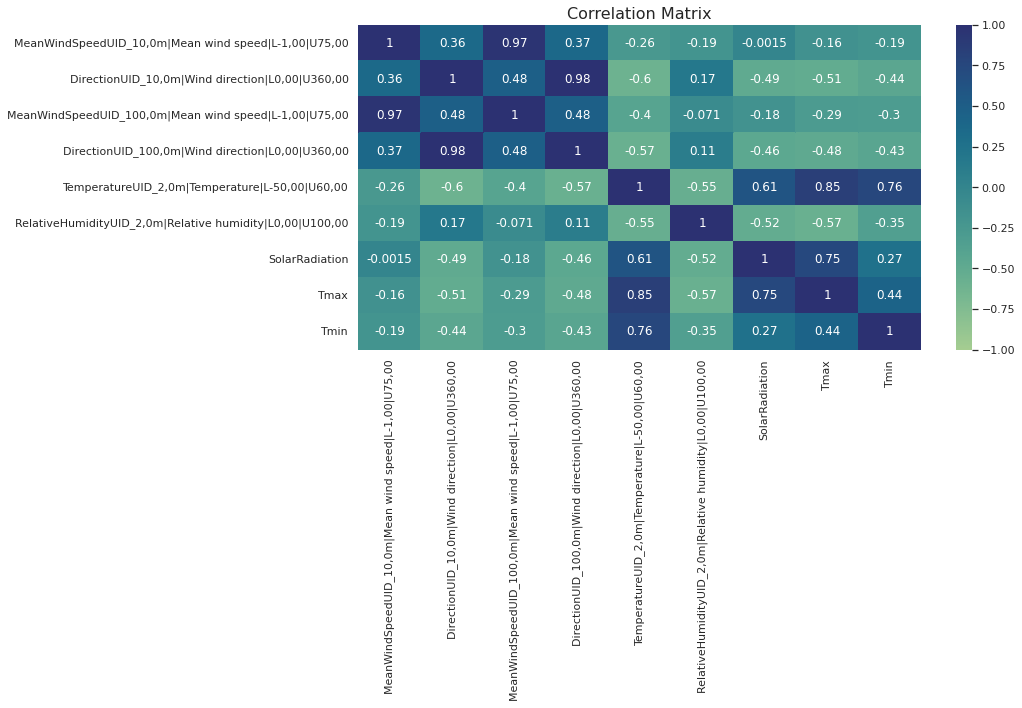

In [40]:
f, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

core_columns2=['TimesStamp',
                 'MeanWindSpeedUID_10,0m|Mean wind speed|L-1,00|U75,00', 
                 'DirectionUID_10,0m|Wind direction|L0,00|U360,00',
                 'MeanWindSpeedUID_100,0m|Mean wind speed|L-1,00|U75,00', 
                 'DirectionUID_100,0m|Wind direction|L0,00|U360,00',  
                 'TemperatureUID_2,0m|Temperature|L-50,00|U60,00',
                 'RelativeHumidityUID_2,0m|Relative humidity|L0,00|U100,00','SolarRadiation','Tmax','Tmin']

corrmat = df[core_columns2].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='crest')

#'coolwarm_r'
ax1.set_title('Correlation Matrix', fontsize=16)



plt.tight_layout()
plt.show()